# Regresion Lineal para el Aprendizaje Automatico.

Metodo estadistico que se utiliza para el analisis predictivo. Y es uno de los algoritmos parametricos de ML, en los cuales el <br>
resultado del proceso de entrenamiento es una funcion matematica que se aproxima lo mejor posible a los patrones del conjunto <br>
de entrenamiento. Es decir, funcionan haciendo suposiciones sobre la realcion entre las caracteristicas y la columna objetivo.<br>

En la _**regresion lineal**_, se expresa con una ecuacion de regresion lineal: $$ \widehat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n} $$

Donde: 
- $ \widehat{y} $ es el valor predicho.
- $ n $ es el numero de caracteristicas.
- $ x_{i} $ es el i-ésimo valor de característica.
- $ \theta_{j} $ es el j-esimo parametro del modelo (incluyendo el termino _bias_ $ \theta_{0} $ y los pesos de las caracteristicas $ \theta_{1}, \theta_{2}, ..., \theta_{n} $).

Aunque tambien se puede expresar en su forma _**vectorizada**_, de una manera mas concisa: $$ \widehat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta}\cdot\mathbf{x} $$

Donde:
- $ \mathbf{\theta} $ &nbsp; es el _vector de parametros_ del modelo, contiene el termino _bais_ &nbsp; $ \theta_{0} $ y los pesos de las caracteristicas &nbsp; $ \theta_{1} $ &nbsp; a &nbsp; $ \theta_{n} $
- $ \mathbf{x} $ &nbsp; es el _vector de caracteristicas_ de la instancia, contiene &nbsp; $ x_{0} $ &nbsp; a &nbsp; $ x_{n} $, con &nbsp; $ x_{0} $ siempre igual a 1.
- $ \mathbf{\theta}\cdot\mathbf{x} $ &nbsp; es el **producto punto** de los vectores &nbsp; $ \mathbf{\theta} $ &nbsp; y &nbsp; $ \mathbf{x} $, el cual es por su puesto igual a &nbsp; $ \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n} $
- $ h_{\mathbf{\theta}} $ &nbsp; es la funcion hipotetica, usando los parametros del modelo &nbsp; $ \mathbf{\theta} $.

### Modelo de Regresion Lineal

Para encontrar el valor de &nbsp; $ \mathbf{\theta} $ &nbsp; se utiliza la _**Ecuacion Normal**_: $$ \widehat{\mathbf{\theta}} = (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y}$$

Donde:
- $ \widehat{\mathbf{\theta}} $ &nbsp; es el valor de &nbsp; $ \mathbf{\theta} $ &nbsp; que minimiza el costo de la funcion.
- $ \mathbf{y} $ &nbsp; es el vector de valores objetivo que contiene de &nbsp; $ y^{(1)} $ &nbsp; a &nbsp; $ y^{(m)} $.

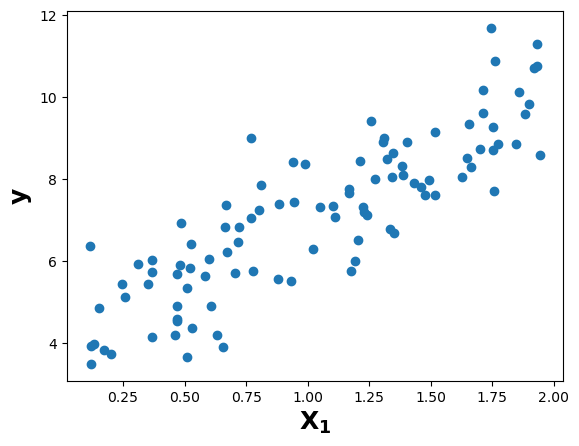

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generando datos 'lineales'.
X = 2 * np.random.rand(100, 1)
y =  4 + 3 * X + np.random.randn(100, 1)

# Graficando datos
plt.scatter(X, y)
plt.xlabel(r'$\mathbf{X_{1}}$', fontsize=18)
plt.ylabel(r'$\mathbf{y}$', fontsize=18)
plt.show()

#### Calculando $ \widehat{\mathbf{\theta}} $ usando la _Ecuacion Normal_.

In [31]:
# Concatenando el valor _bais_.
X_b = np.c_[ np.ones((100, 1)), X ]  # Se le agrega el valor x0 a cada instancia.

# Calculando el valor theta.
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot( X_b.T ).dot(y)  

En este caso &nbsp; $ \mathbf{y} = 4 + 3x_{1} + Ruido Gaussiano $.

In [32]:
theta_best

array([[3.97541178],
       [3.04595218]])

Nosotros esperabamos que &nbsp; $ \theta_{0} = 4 $ &nbsp; y &nbsp; $ \theta_{1} = 3 $ &nbsp; en lugar de &nbsp; $ \theta_{0} = 3.9509 $ &nbsp; y &nbsp; $ \theta_{1} = 2.97 $ &nbsp;. Muy cerca, pero el _ruido_ hizo imposible <br> recuperar los parametros exactos de la funcion original. <br>

Ahora podemos hacer predicciones usando $ \widehat{\mathbf{\theta}} $:

In [33]:
X_new = np.array([[0], [2]])
print(X_new)
X_new_b = np.c_[np.ones((2,1)), X_new] # Agregando el termino 'bais'.
y_predict = X_new_b.dot(theta_best)
y_predict

[[0]
 [2]]


array([[ 3.97541178],
       [10.06731614]])

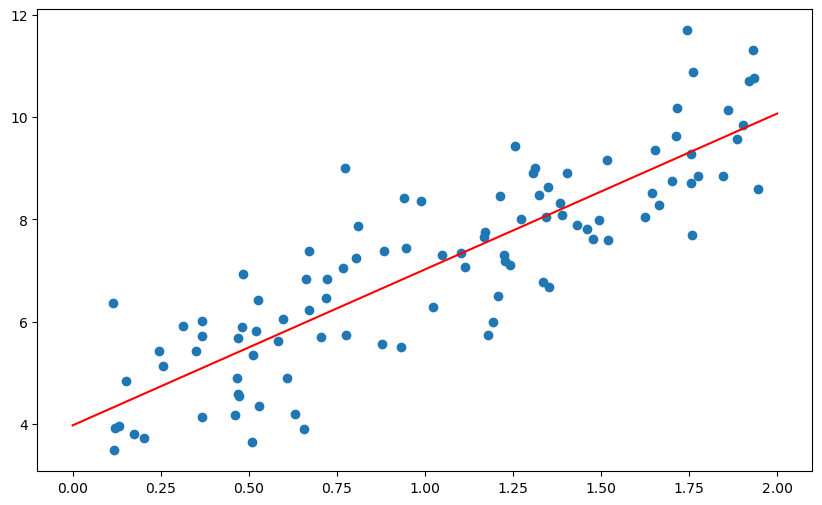

In [34]:
plt.figure(figsize=(10,6)) # Cambiando tamaño del Plot
plt.plot(X_new, y_predict, 'r-')
plt.scatter(X, y,)
plt.show()

## Usando Scikit-Learn

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

#### Cual es la ecuacion que nos dio como resultado?

In [36]:
lin_reg.coef_

array([[3.04595218]])

In [37]:
lin_reg.intercept_

array([3.97541178])

In [38]:
m = lin_reg.coef_[0][0]

b = lin_reg.intercept_[0]

print(f'y = {m:.2f}x + {b:.2f}')

y = 3.05x + 3.98


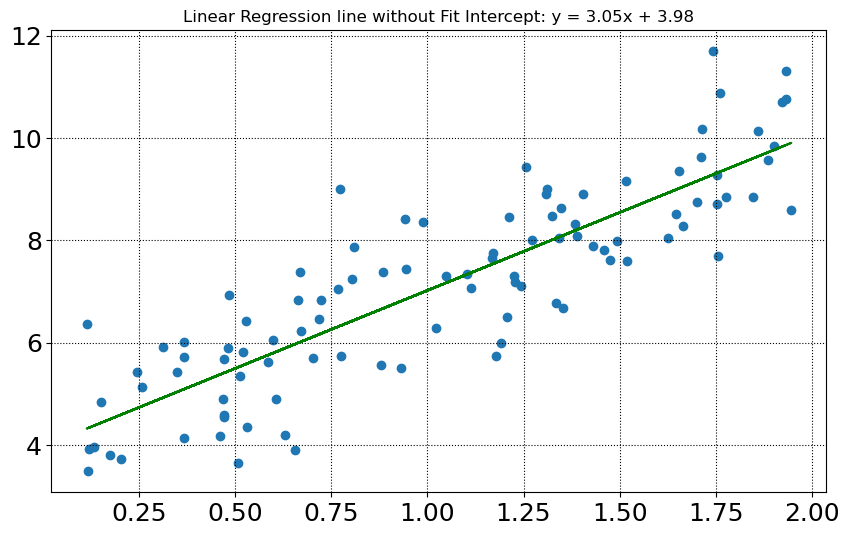

In [41]:
# Graficando 
plt.figure(figsize=(10,6)) # Cambiando tamaño del Plot
plt.scatter(X, y,)
plt.plot(X, lin_reg.predict(X), 'g-')
plt.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
plt.tick_params(labelsize = 18)
plt.title(f'Linear Regression line without Fit Intercept: y = {m:.2f}x + {b:.2f}')
plt.show()